In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
np.set_printoptions(threshold=sys.maxsize)
file = open("Dataforcourseproject_DiegoFernandez.txt")
row = [] #initializes a blank row of data
sample =[] 
c = 0
Site =[] #initalizes each set of data for graphing and PCA
NH4 =[] 
NOx =[]
OrthoP =[]
TotalP=[]
TKN=[]
Month=[]
datforpca = []
Concentrations =[] #for checking correlations of each chemical to eachother 
names =[]
first = True
char = ')(' #inializes to remove objects in the list that contains this character
for line in file: 
    if first == True: #header capture line
        data = line.split("\t") #splits list of data given
        header = data
        names = data[3:8]
        #print(names)
        #print(data)
        first = False
    elif str(line[0]+line[1]+line[2]+line[3]) == "Pipe": #seperates the pipe outflow from the rest of the data
        data = line.split("\t")
        PipeOutflow = data
    else:
        for count in line:
            #print(count)
            if line[c] == "(":
                line = line.replace('(','\t')
            c += 1
        c = 0 #resets count
        data = line.split("\t")
        #print(data)
        for elem in data[:]: #removes the objects in the list that contain the character )
            if any(objec in elem for objec in char):
                data.remove(elem)
        #print(data)
        if data[0] == "Piney Point Reservoir":
            data[0] =0
        if data[0] == "Piney Point":
            data[0] =1
        if data[0] == "Bishop Harbor":
            data[0] =2
        if data[0] == "Joe Bay":
            data[0] =3
        if data[0] == "St. Joseph Sound":
            data[0] = 4
        if data[3] == '-': #replaces blank points in the data that were undectable with 0
            data[3] =0
        if data[4] =='-': 
            data[4] =0
        if data[5] == '-':
            data[5] =0
        if data[6] == '-': 
            data[6] =0
        if data[7] == '-' or data[7] == 'ND':
            data[7] =0
        if data[2] == "April": #converts the month into a number representing that month after the incident (eg April = 4)
            data[2] =1
        elif data[2] == "May":
            data[2] =2
        elif data[2] == "June":
            data[2] =3
        elif data[2] == "July":
            data[2] =4
        elif data[2] == "August":
            data[2] =5
        elif data[2] == "September":
            data[2] =6
        elif data[2] == "October":
            data[2] =7
        elif data[2] == "November":
            data[2] =8
        elif data[2] == "December":
            data[2] =9
        elif data[2] == "January":
            data[2] =10
        elif data[2] == "February":
            data[2] =11
        elif data[2] == "March":
            data[2] =12
        data[8] = ''
        del data [8]
        Month.append(int(data[2]))
        Site.append(int(data[0]))
        NH4.append(float(data[3]))
        NOx.append(float(data[4]))
        OrthoP.append(float(data[5]))
        TotalP.append(float(data[6]))
        TKN.append(float(data[7]))
        row.append(int(data[0])) #Site
        row.append(int(data[1])) #year
        row.append(int(data[2])) #month
        row.append(float(data[3])) #NH4-N
        row.append(float(data[4])) #NO-x
        row.append(float(data[5])) #Ortho P
        row.append(float(data[6])) #Total P
        row.append(float(data[7])) #TKN
        sample.append(row)
        datforpca.append(row[3:7])
        row = []
dataset = np.array(sample)
Concentrations.append(NH4)
Concentrations.append(NOx)
Concentrations.append(OrthoP)
Concentrations.append(TotalP)
Concentrations.append(TKN)
#print(dataset)
del datforpca[0]
#print(datforpca)

In [4]:
#Mean and median for each set of data, only for sample sites, excludes pipe outflow
mean = np.mean(dataset, axis=0)
median = np.std(dataset, axis=0)
print("Mean of NH-4 (mg L-1):",mean[3])
print("Median of NH-4 (mg L-1):",median[3])
print("Mean of NO-x (mg L-1):",mean[4])
print("Median of NO-x (mg L-1):",median[4])
print("Mean of OrthoP (æg L-1):",mean[5])
print("Median of OrthoP (æg L-1):",median[5])
print("Mean of Total P (ug L-1):",mean[6])
print("Median of Total P (ug L-1):",median[6])
print("Mean of TKN (mg L-1):",mean[7])
print("Median of TKN (mg L-1):",median[7])

Mean of NH-4 (mg L-1): 0.5679245283018868
Median of NH-4 (mg L-1): 3.6687133925353446
Mean of NO-x (mg L-1): 0.0
Median of NO-x (mg L-1): 0.0
Mean of OrthoP (æg L-1): 194.0762264150944
Median of OrthoP (æg L-1): 1041.7229863162868
Mean of Total P (ug L-1): 379.0726415094342
Median of Total P (ug L-1): 2101.902856859058
Mean of TKN (mg L-1): 0.859811320754717
Median of TKN (mg L-1): 3.3289538787229076


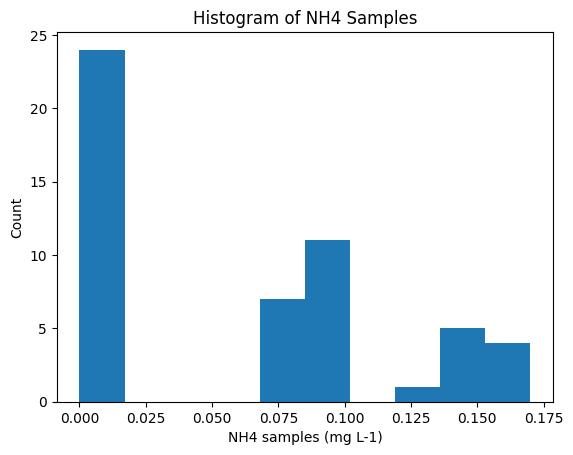

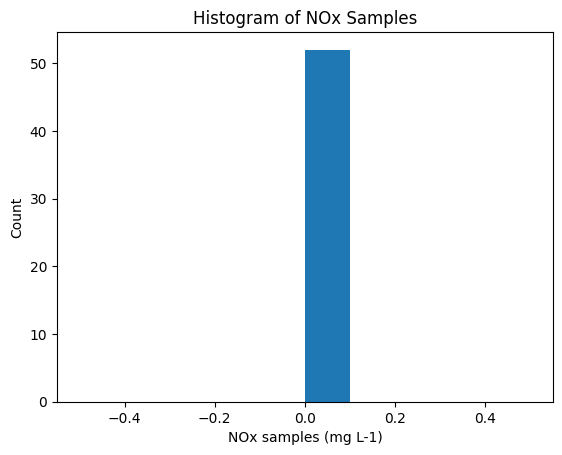

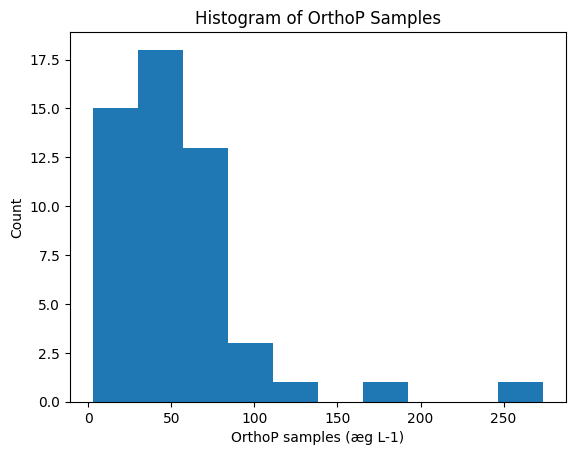

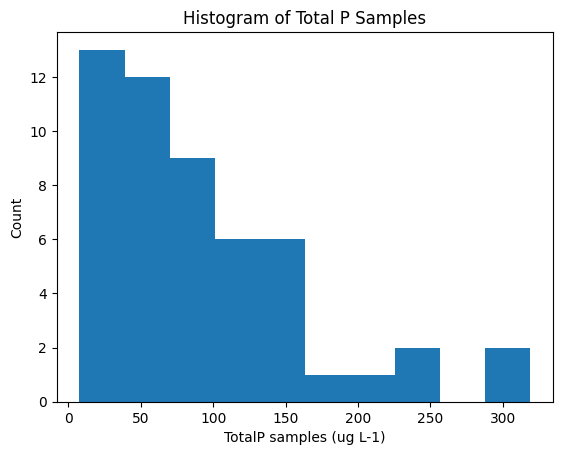

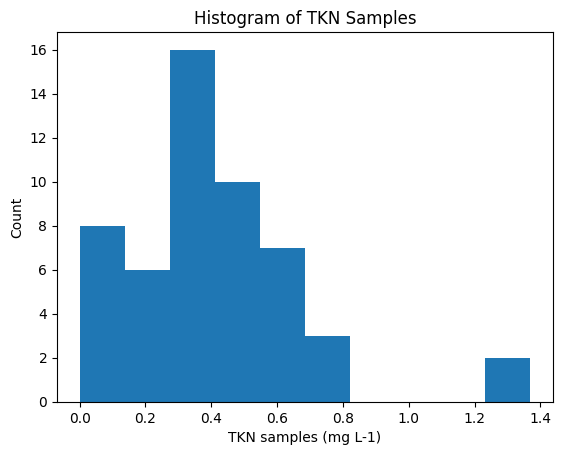

In [5]:
#Histograms of data, histograms exclude Piney Point Reservoir as it acts as an outlier for the graph
#NH-4 (mg L-1)
plt.hist(NH4[1:],bins=10) 
plt.ylabel('Count')
plt.xlabel('NH4 samples (mg L-1)');
plt.title('Histogram of NH4 Samples') 
plt.show()
#NO-x (mg L-1)
plt.hist(NOx[1:],bins=10)
plt.ylabel('Count')
plt.xlabel('NOx samples (mg L-1)');
plt.title('Histogram of NOx Samples') 
plt.show()
#Ortho P (æg L-1)
plt.hist(OrthoP[1:],bins=10)
plt.ylabel('Count')
plt.xlabel('OrthoP samples (æg L-1)');
plt.title('Histogram of OrthoP Samples') 
plt.show()
#Total P (ug L-1)
plt.hist(TotalP[1:],bins=10)
plt.ylabel('Count')
plt.xlabel('TotalP samples (ug L-1)');
plt.title('Histogram of Total P Samples') 
plt.show()
#TKN (mg L-1)
plt.hist(TKN[1:],bins=10)
plt.ylabel('Count')
plt.xlabel('TKN samples (mg L-1)');
plt.title('Histogram of TKN Samples') 
plt.show()

In [6]:
#Correlation Pearson and Spearman Correlation
#NH4
x = Site
y = NH4
res = stats.pearsonr(x, y)
res
spe = stats.spearmanr(x, y)
spe.statistic
print("NH4,",res,spe)
#NOx
x = Site
a = NOx
res = stats.pearsonr(x, a)
res
spe = stats.spearmanr(x, a)
spe.statistic
print("NOx,",res,spe)
#OrthoP
x = Site
b = OrthoP
res = stats.pearsonr(x, b)
res
spe = stats.spearmanr(x, b)
spe.statistic
print("OrthoP,",res,spe)
#Total P
x = Site
c = TotalP
res = stats.pearsonr(x, c)
res
spe = stats.spearmanr(x, c)
spe.statistic
print("TotalP,",res,spe)
#TKN
x = Site
d = TKN
res = stats.pearsonr(x, d)
res
spe = stats.spearmanr(x, d)
spe.statistic
print("TKN,",res,spe)

NH4, PearsonRResult(statistic=-0.29437152887377116, pvalue=0.032386036717955057) SignificanceResult(statistic=-0.10810261790698027, pvalue=0.44100647315742625)
NOx, PearsonRResult(statistic=nan, pvalue=nan) SignificanceResult(statistic=nan, pvalue=nan)
OrthoP, PearsonRResult(statistic=-0.31267953741690085, pvalue=0.022634443791375643) SignificanceResult(statistic=-0.5337213713529225, pvalue=3.8643330917942634e-05)
TotalP, PearsonRResult(statistic=-0.3070920886692237, pvalue=0.025305695704566596) SignificanceResult(statistic=-0.4765558407307348, pvalue=0.00030936235646867124)
TKN, PearsonRResult(statistic=-0.2992945946110986, pvalue=0.02947191872419255) SignificanceResult(statistic=0.014615289589706223, pvalue=0.9172731116444008)


/scratch/local/51059652/ipykernel_3855185/2339633924.py:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  res = stats.pearsonr(x, a)
/scratch/local/51059652/ipykernel_3855185/2339633924.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spe = stats.spearmanr(x, a)


In [7]:
#Pearson Correlations between each chemical
for n in Concentrations:
    for m in Concentrations:
        x = n #initialize variables for pearson correlation
        y = m
        ind1 = Concentrations.index(n)
        ind2 = Concentrations.index(m)
        correlation = stats.pearsonr(x, y)
        #print(names[ind1],"vs.", names[ind2], "P-value =",p_value) #test to make sure the for loop iterates through each sample
        if names[ind1] != names[ind2]:
            print(names[ind1],"vs.", names[ind2], "Pearson:",correlation)
        

NH4-N (mg L-1) vs. NOx (mg L-1) Pearson: PearsonRResult(statistic=nan, pvalue=nan)
NH4-N (mg L-1) vs. OrthoP (æg L-1) Pearson: PearsonRResult(statistic=0.9989414454563451, pvalue=7.03166701841605e-70)
NH4-N (mg L-1) vs. Total P (ug L-1) Pearson: PearsonRResult(statistic=0.9993310736365902, pvalue=5.83462667829379e-75)
NH4-N (mg L-1) vs. TKN (mg L-1) Pearson: PearsonRResult(statistic=0.9959525923084797, pvalue=4.83686298572088e-55)
NOx (mg L-1) vs. NH4-N (mg L-1) Pearson: PearsonRResult(statistic=nan, pvalue=nan)
NOx (mg L-1) vs. OrthoP (æg L-1) Pearson: PearsonRResult(statistic=nan, pvalue=nan)
NOx (mg L-1) vs. Total P (ug L-1) Pearson: PearsonRResult(statistic=nan, pvalue=nan)
NOx (mg L-1) vs. TKN (mg L-1) Pearson: PearsonRResult(statistic=nan, pvalue=nan)
OrthoP (æg L-1) vs. NH4-N (mg L-1) Pearson: PearsonRResult(statistic=0.9989414454563451, pvalue=7.03166701841605e-70)
OrthoP (æg L-1) vs. NOx (mg L-1) Pearson: PearsonRResult(statistic=nan, pvalue=nan)
OrthoP (æg L-1) vs. Total P (u

/scratch/local/51059652/ipykernel_3855185/54986139.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = stats.pearsonr(x, y)


In [8]:
for n in Concentrations:
    x = n
    y = Month
    ind1 = Concentrations.index(n)
    correlation = stats.pearsonr(x, y)
    print(names[ind1], "Pearson: ", correlation)
        

/scratch/local/51059652/ipykernel_3855185/3345875368.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = stats.pearsonr(x, y)


NH4-N (mg L-1) Pearson:  PearsonRResult(statistic=0.031011234118941185, pvalue=0.8255326042530147)
NOx (mg L-1) Pearson:  PearsonRResult(statistic=nan, pvalue=nan)
OrthoP (æg L-1) Pearson:  PearsonRResult(statistic=0.02040719057902037, pvalue=0.8846800661495416)
Total P (ug L-1) Pearson:  PearsonRResult(statistic=0.02164967685473699, pvalue=0.8777109041473963)
TKN (mg L-1) Pearson:  PearsonRResult(statistic=0.05256615225703948, pvalue=0.708537702191492)


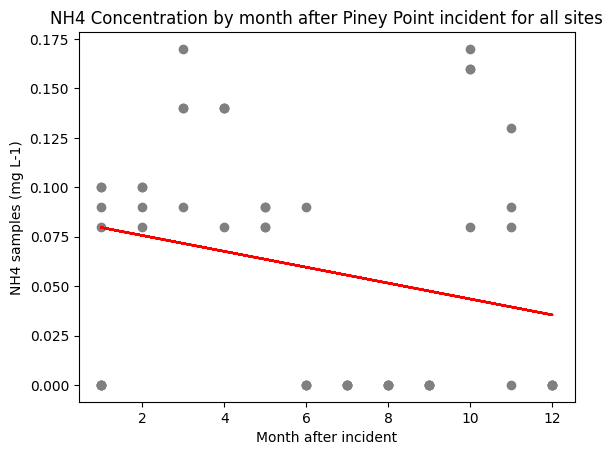

R-squared for NH4: 0.060319


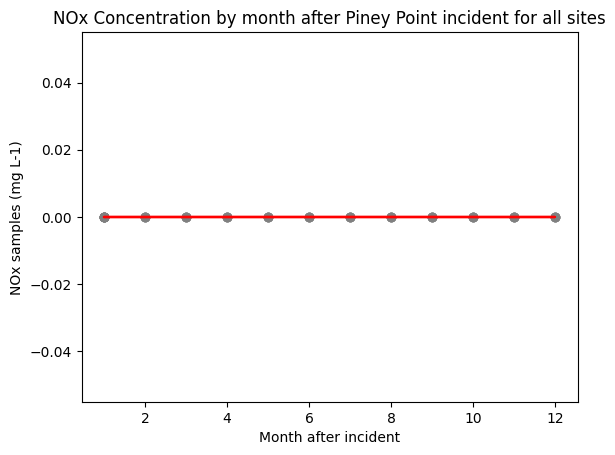

R-squared for NOx: 0.000000


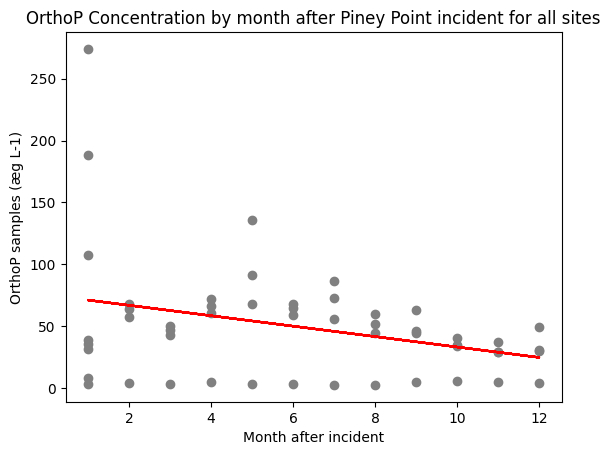

R-squared for OrthoP: 0.103906


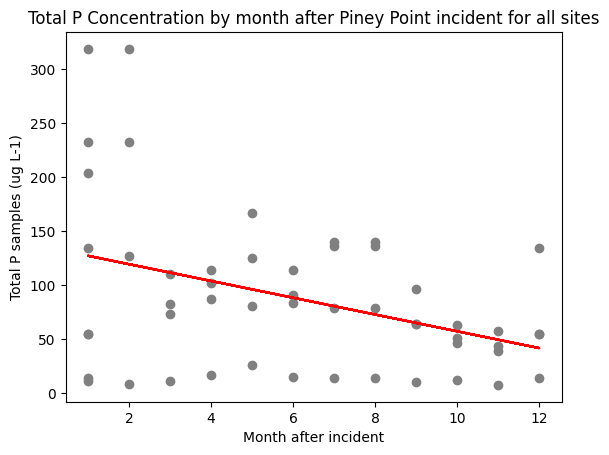

R-squared for TotalP: 0.149988


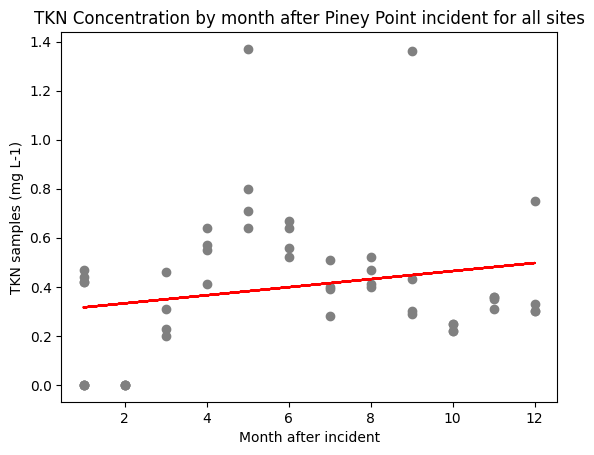

R-squared for TKN: 0.044466


In [9]:
#Linear Regression
y1 = NH4[1:] #NH4 values for y-axis 
y2 = NOx[1:] #NOx values for y-axis
y3 = OrthoP[1:] #OrthoP values for y-axis
y4 =TotalP[1:] #TotalP values for y-axis
y5 = TKN[1:] #TKN values for y-axis
x = Month[1:]
count = 0
liny1 =[] #used to create the linear regression data for each plot
liny2 =[]
liny3 =[]
liny4 =[]
liny5 =[]
fig,ax = plt.subplots()
model1 = stats.linregress(x, y1)
ax.scatter(x,y1,c="grey", label='original data')
while count < len(x): #initializes the linear regression data for each sample
    num = model1.intercept + model1.slope*x[count]
    liny1.append(num)
    count += 1
count = 0
ax.plot(x, liny1, 'r', label='fitted line')
ax.set_ylabel('NH4 samples (mg L-1)')
ax.set_xlabel('Month after incident') #month 1 is April, 2 May, 3 June, etc.
plt.title('NH4 Concentration by month after Piney Point incident for all sites') 
plt.show()
print(f"R-squared for NH4: {model1.rvalue**2:.6f}") #r-value for each sample

fig,bx = plt.subplots()
model2 = stats.linregress(x, y2)
while count < len(x):
    num = model2.intercept + model2.slope*x[count]
    liny2.append(num)
    count += 1
count = 0
bx.plot(x, liny2, 'r', label='fitted line')
bx.scatter(x,y2,c="grey",label='original data')
bx.set_ylabel('NOx samples (mg L-1)')
bx.set_xlabel('Month after incident') #month 1 is April, 2 May, 3 June, etc.
plt.title('NOx Concentration by month after Piney Point incident for all sites') 
plt.show()
print(f"R-squared for NOx: {model2.rvalue**2:.6f}")

fig,cx = plt.subplots()
model3 = stats.linregress(x, y3)
while count < len(x):
    num = model3.intercept + model3.slope*x[count]
    liny3.append(num)
    count += 1
count = 0
cx.plot(x, liny3, 'r', label='fitted line')
cx.scatter(x,y3,c="grey",label='original data')
cx.set_ylabel('OrthoP samples (æg L-1)')
cx.set_xlabel('Month after incident') #month 1 is April, 2 May, 3 June, etc.
plt.title('OrthoP Concentration by month after Piney Point incident for all sites') 
plt.show()
print(f"R-squared for OrthoP: {model3.rvalue**2:.6f}")

fig,dx = plt.subplots()
model4 = stats.linregress(x, y4)
while count < len(x):
    num = model4.intercept + model4.slope*x[count]
    liny4.append(num)
    count += 1
count = 0
dx.plot(x, liny4, 'r', label='fitted line')
dx.scatter(x,y4,c="grey",label='original data')
dx.set_ylabel('Total P samples (ug L-1)')
dx.set_xlabel('Month after incident') #month 1 is April, 2 May, 3 June, etc.
plt.title('Total P Concentration by month after Piney Point incident for all sites') 
plt.show()
print(f"R-squared for TotalP: {model4.rvalue**2:.6f}")

fig,ex = plt.subplots()
model5 = stats.linregress(x, y5,)
while count < len(x):
    num = model5.intercept + model5.slope*x[count]
    liny5.append(num)
    count += 1
count = 0
ex.plot(x, liny5, 'r', label='fitted line')
ex.scatter(x,y5,c="grey",label='original data')
ex.set_ylabel('TKN samples (mg L-1)')
ex.set_xlabel('Month after incident') #month 1 is April, 2 May, 3 June, etc.
plt.title('TKN Concentration by month after Piney Point incident for all sites') 
plt.show()
print(f"R-squared for TKN: {model5.rvalue**2:.6f}")

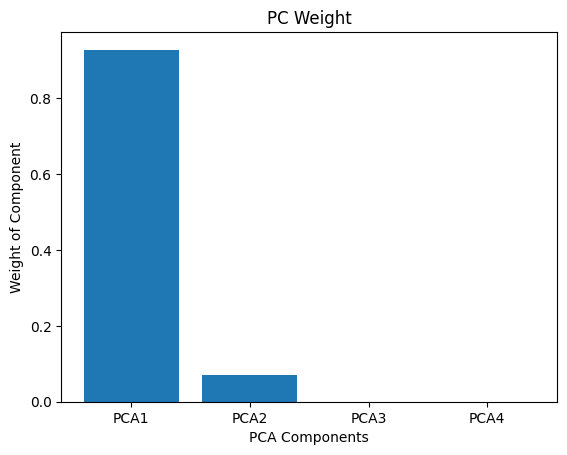

PCA1: 0.9285715300660156 PCA2: 0.07142800968466242 PCA3: 4.602493219736218e-07 PCA4: 1.86857040251517e-36


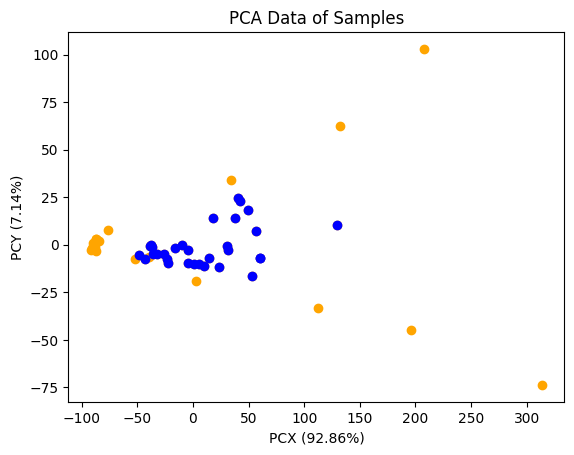

In [10]:
#Dimensionality reduction
#PCA
datforpca = np.array(datforpca) #creates array of just the quantifiable points of data for the pca
pca = PCA()
#print(datforpca)
principal_components = pca.fit_transform(datforpca)
#print(principal_components)
PCAComponents =['PCA1','PCA2','PCA3','PCA4'] #for x-axis on bargraph
variancelist = pca.explained_variance_ratio_
plt.bar(PCAComponents,variancelist)
plt.xlabel("PCA Components")
plt.ylabel("Weight of Component")
plt.title("PC Weight")
plt.show()
print("PCA1:",variancelist[0],"PCA2:",variancelist[1],"PCA3:",variancelist[2],"PCA4:",variancelist[3])
fig, ax = plt.subplots()
PCX=0
PCY=1
ax.scatter(principal_components[: , PCX], principal_components[: , PCY], c="orange")
ax.scatter(principal_components[2:4, PCX], principal_components[2:4, PCY], c="blue")
ax.scatter(principal_components[5, PCX], principal_components[5, PCY], c="blue")
ax.scatter(principal_components[6:9 , PCX], principal_components[6:9, PCY], c="blue")
ax.scatter(principal_components[11:13, PCX], principal_components[11:13, PCY], c="blue")
ax.scatter(principal_components[15:17, PCX], principal_components[15:17, PCY], c="blue")
ax.scatter(principal_components[18:20, PCX], principal_components[18:20, PCY], c="blue")
ax.scatter(principal_components[19:38, PCX], principal_components[19:38, PCY], c="blue")

#ax.scatter(principal_components[: , PCX], principal_components[: , PCY], c="green") #for pc3
#ax.scatter(principal_components[: , 0], principal_components[: , 3], c="red") #for pc4
label_X = "PCX (" + str(np.round(pca.explained_variance_ratio_[PCX]*100, decimals=2)) + "%)"
label_Y = "PCY (" + str(np.round(pca.explained_variance_ratio_[PCY]*100, decimals=2)) + "%)"
ax.set_xlabel(label_X)
ax.set_ylabel(label_Y)
plt.title('PCA Data of Samples')
plt.show()